In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('../../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Model Development

### Train baseline model

In [6]:
# specify predictor variables
X = df.drop(columns='Class')
# specify target variable
y = df.Class

In [8]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
y.tail()

284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [12]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9991924440855307


In [24]:
f1s = f1_score(y_test, y_pred)
print(f1s)

0.7628865979381444


In [25]:
precision = precision_score(y_test, y_pred)
print(precision)

0.7762237762237763


In [27]:
print(recall_score(y_test, y_pred))

0.75


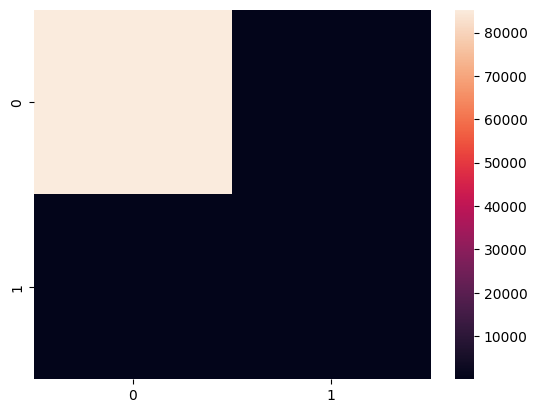

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

In [40]:
confusion_matrix(y_test, y_pred)

array([[85263,    32],
       [   37,   111]])

## Cross Validation

In [45]:
score = cross_val_score(model, X, y, cv=5, scoring='precision')

In [47]:
print(score)

[0.00160494 0.86206897 0.23170732 0.6        0.7032967 ]


In [49]:
print(np.mean(score))

0.47973558483174406


In [51]:
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:,1]

In [53]:
print(y_scores)

[1. 1. 1. ... 0. 0. 0.]


## Data Balancing

In [58]:
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [63]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [64]:
print(accuracy_score(y_test, y_pred))

0.9975773322565921


In [65]:
print(f1_score(y_test, y_pred))

0.5263157894736842


In [66]:
print(precision_score(y_test, y_pred))

0.39792387543252594


In [67]:
print(recall_score(y_test, y_pred))

0.777027027027027
